# DecisionTreeClassifier

In [1]:
# 데이터 처리
import pandas as pd
# 데이터 시각화

import matplotlib.pyplot as plt ; import matplotlib
# 나무 구조 시각화
from sklearn.tree import plot_tree
# 데이터 분할: Train, Test
from sklearn.model_selection import train_test_split
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# 한글 폰트 설정
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시 설정
matplotlib.rc('axes', unicode_minus = False)

## 데이터 불러오기

In [3]:
# dataset
df1 = pd.read_csv('hr_preprocessed_1470_24.csv', index_col = 0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   Gender                    1470 non-null   object 
 7   HourlyRate                1470 non-null   int64  
 8   JobInvolvement            1470 non-null   int64  
 9   JobRole                   1470 non-null   object 
 10  JobSatisfaction           1470 non-null   int64  
 11  MaritalStatus             1470 non-null   object 
 12  MonthlyIncome             1470 non-null   int64  
 13  NumCompaniesWorked        1470 non-null   int64  
 14  OverTime

In [4]:
# 기초통계량을 이용한 데이터의 개략적인 확인
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager,Low_Satisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,65.891156,2.729932,2.728571,6502.931293,2.693197,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.123129,0.193197
std,9.135373,403.509100,8.106864,1.024165,20.329428,0.711561,1.102846,4707.956783,2.498009,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.568136,0.394941
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,4.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,100.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,17.000000,1.000000


In [5]:
# 결측치 확인
df1.isnull().sum(axis = 0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsWithCurrManager        0
Low_Satisfaction            0
dtype: int64

## target변수/feature 변수 preprocessing

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
catColumns = df1.select_dtypes(['object']).columns

for col in catColumns:
    n = len(df1[col].unique())
    if (n > 2):
       X = pd.get_dummies(df1[col])
       X = X.drop(X.columns[0], axis=1)
       df1[X.columns] = X
       df1.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
       label_encoder.fit(df1[col])
       df1[col] = label_encoder.transform(df1[col])

## Train/Test Split

In [7]:
features = df1.drop('Attrition', axis = 1)
labels = df1['Attrition']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 32)
(441, 32)
(1029,)
(441,)


## Model Creation/fit

In [59]:
# 임의의 parameter

# point1: 파라미터를 바꾸어가면서 성능 변화 관찰


model_dt = DecisionTreeClassifier(criterion = 'entropy', 
                                 max_depth = 4,
                                 min_samples_leaf = 8)

In [10]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=8)

In [11]:
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_train, y_train)))
print("평가용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_test, y_test)))

학습용 데이터의 정확도 : 0.886
평가용 데이터의 정확도 : 0.846


## 모델 파라미터 조정 - manual search

ex. max_depth: 최대 깊이 변경에 따른 모델 성능

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(X_train, y_train)
    train_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test,y_test))
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

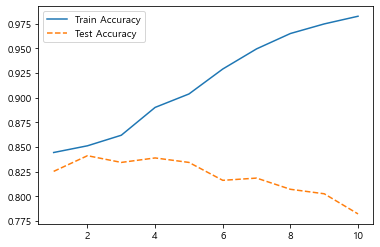

In [13]:
# 모델 정확도 확인
df_accuracy_depth.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

## GridSearchCV를 이용한 최적 파라미터 추정

In [37]:
estimator = DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_list = {"max_depth": para_depth, "min_samples_split": [2,3,4,5],
"min_samples_leaf": [2,3,4,5]}

    # 위의 manual search 에서 para_depth의 범위 지정해주었기 때문에 그대로 변수로 넣을 수 있음
    # 나머지 parameter들은 임의로 범위를 지정하고 다양한 버전의 gridsearch 돌려볼 수 있음

# 정확도가 높은 최적 parameter 찾기
#grid_dt = RandomizedSearchCV(estimator, param_list, scoring="accuracy", n_jobs = -1)
grid_dt = GridSearchCV(estimator, param_list, scoring="accuracy", n_jobs = -1)
grid_dt.fit(X_train, y_train)
print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=1, min_samples_leaf=2)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score: 
0.845


## Score (Accuracy)

In [38]:
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_train, y_train)))
print("평가용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_test, y_test)))

학습용 데이터의 정확도 : 0.886
평가용 데이터의 정확도 : 0.846


## Classification Report

In [39]:
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

In [40]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       869
           1       0.73      0.42      0.54       160

    accuracy                           0.89      1029
   macro avg       0.82      0.70      0.74      1029
weighted avg       0.88      0.89      0.87      1029



In [41]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       364
           1       0.63      0.29      0.39        77

    accuracy                           0.85       441
   macro avg       0.75      0.62      0.65       441
weighted avg       0.82      0.85      0.82       441



# LogisticRegression

## Baseline (beginner)

In [42]:
# 데이터 처리
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt ; import matplotlib
# 데이터 분할: Train, Test
from sklearn.model_selection import train_test_split
# 스케일링
from sklearn.preprocessing import StandardScaler
# 모델
from sklearn.linear_model import LogisticRegression
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 모델 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 데이터 불러오기

In [43]:
# dataset
df1 = pd.read_csv('hr_preprocessed_1470_24.csv', index_col = 0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   Gender                    1470 non-null   object 
 7   HourlyRate                1470 non-null   int64  
 8   JobInvolvement            1470 non-null   int64  
 9   JobRole                   1470 non-null   object 
 10  JobSatisfaction           1470 non-null   int64  
 11  MaritalStatus             1470 non-null   object 
 12  MonthlyIncome             1470 non-null   int64  
 13  NumCompaniesWorked        1470 non-null   int64  
 14  OverTime

In [44]:
# 결측치 확인
df1.isnull().sum(axis = 0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsWithCurrManager        0
Low_Satisfaction            0
dtype: int64

In [45]:
# 기초통계량을 이용한 데이터의 개략적인 확인
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager,Low_Satisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,65.891156,2.729932,2.728571,6502.931293,2.693197,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.123129,0.193197
std,9.135373,403.509100,8.106864,1.024165,20.329428,0.711561,1.102846,4707.956783,2.498009,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.568136,0.394941
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,4.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,100.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,17.000000,1.000000


In [46]:
# Target 컬럼 확인
df1.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Target 변수/ Feature 변수 preprocessing

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
catColumns = df1.select_dtypes(['object']).columns

# 범주형 변수를 더미변수로 만들기
for col in catColumns:
    n = len(df1[col].unique())
    if (n > 2):
       X = pd.get_dummies(df1[col])
       X = X.drop(X.columns[0], axis=1)
       df1[X.columns] = X
       df1.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
       label_encoder.fit(df1[col])
       df1[col] = label_encoder.transform(df1[col])

In [48]:
# Target column이 숫자 형태로 변화된 것을 확인
df1.Attrition.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [49]:
# 범주형 컬럼이 더미변수로 변환된 것을 확인
df1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
0,41,1,1102,1,2,0,94,3,4,5993,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,61,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,92,2,3,2090,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,0,56,3,3,2909,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,40,3,2,3468,...,0,1,0,0,0,0,0,0,1,0


## Train/Test Split

In [50]:
# feature, label 분리
features = df1.drop(['Attrition'], axis = 1)
labels = df1['Attrition']
print(features.shape)
print(labels.shape)

(1470, 32)
(1470,)


In [51]:
# train, test 분리
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size = 0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)

(1029, 32)
(1029,)


## Scaling

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
    # fit은 각 속성feature마다 컬럼 만드는 작업
X_test_scaled = scaler.transform(X_test)

## Model Creation/fit

In [53]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

    # parameter 조절하여 성능을 높여보기

LogisticRegression()

## Score (accuracy)

In [54]:
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(model_lr.score(X_train_scaled, y_train)))
print("평가용 데이터의 정확도 : {:.3f}".format(model_lr.score(X_test_scaled, y_test)))

학습용 데이터의 정확도 : 0.897
평가용 데이터의 정확도 : 0.855


## Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
y_test_pred = model_lr.predict(X_test_scaled)
y_train_pred = model_lr.predict(X_train_scaled)

In [57]:
print(confusion_matrix(y_train, y_train_pred))
print('-----------')
print(classification_report(y_train, y_train_pred))

[[851  18]
 [ 88  72]]
-----------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       869
           1       0.80      0.45      0.58       160

    accuracy                           0.90      1029
   macro avg       0.85      0.71      0.76      1029
weighted avg       0.89      0.90      0.88      1029



In [58]:
print(confusion_matrix(y_test, y_test_pred))
print('-----------')
print(classification_report(y_test, y_test_pred))

[[345  19]
 [ 45  32]]
-----------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       364
           1       0.63      0.42      0.50        77

    accuracy                           0.85       441
   macro avg       0.76      0.68      0.71       441
weighted avg       0.84      0.85      0.84       441

